In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [2]:
data = pd.read_csv("iris.csv")
print(data)

     sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[150 rows x 5 columns]


In [3]:
iris = pd.read_csv("iris.csv")
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


<Axes: xlabel='variety', ylabel='count'>

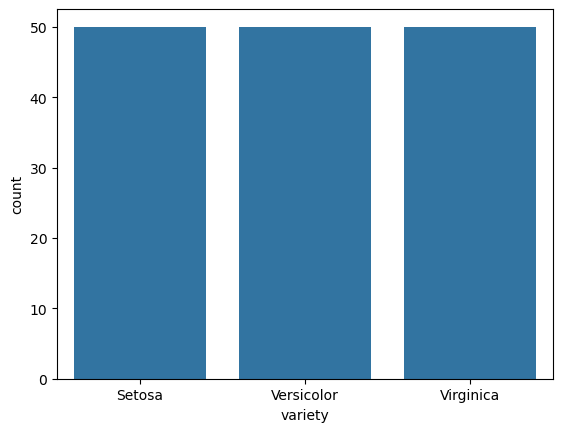

In [4]:
# Bar plot for categorical column "Variety"
import seaborn as sns
counts = iris["variety"].value_counts()
sns.barplot(data = counts )

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
iris[iris.duplicated(keep = False)]

,sepal.length,sepal.width,petal.length,petal.width,variety
101,5.8,2.7,5.1,1.9,Virginica
142,5.8,2.7,5.1,1.9,Virginica


## **Observations**
- There are 150 rows and columns
- There are no Null values
- There is one duplicated row
- The x-columns are sepal.length, sepal.width, petal.length and petal.width
- All the x-columns are continuous
- The y-column is 'Variety' which is categorical
- There are three flower categories(classes)

In [8]:
iris = iris.drop_duplicates(keep = 'first')

In [9]:
iris[iris.duplicated]

,sepal.length,sepal.width,petal.length,petal.width,variety


In [10]:
iris = iris.reset_index(drop=True)
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Virginica
145,6.3,2.5,5.0,1.9,Virginica
146,6.5,3.0,5.2,2.0,Virginica
147,6.2,3.4,5.4,2.3,Virginica


In [11]:
labelencoder = LabelEncoder()
iris.iloc[:, -1] = labelencoder.fit_transform(iris.iloc[:,-1])
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  149 non-null    float64
 1   sepal.width   149 non-null    float64
 2   petal.length  149 non-null    float64
 3   petal.width   149 non-null    float64
 4   variety       149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


## **Observation**
- The target column (variety) is still object type.it needs to be converted to numeric(int)

In [14]:
iris['variety'] = pd.to_numeric(labelencoder.fit_transform(iris['variety']))
print(iris.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  149 non-null    float64
 1   sepal.width   149 non-null    float64
 2   petal.length  149 non-null    float64
 3   petal.width   149 non-null    float64
 4   variety       149 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB
None


In [15]:
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [16]:
X = iris.iloc[:,0:4]
Y = iris['variety']

In [17]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
144    2
145    2
146    2
147    2
148    2
Name: variety, Length: 149, dtype: int32

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3,random_state = 33)
x_train.head(20)
                                                    

,sepal.length,sepal.width,petal.length,petal.width
98,5.1,2.5,3.0,1.1
11,4.8,3.4,1.6,0.2
131,7.9,3.8,6.4,2.0
39,5.1,3.4,1.5,0.2
21,5.1,3.7,1.5,0.4
64,5.6,2.9,3.6,1.3
116,6.5,3.0,5.5,1.8
5,5.4,3.9,1.7,0.4
50,7.0,3.2,4.7,1.4
114,5.8,2.8,5.1,2.4


In [19]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth = None)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

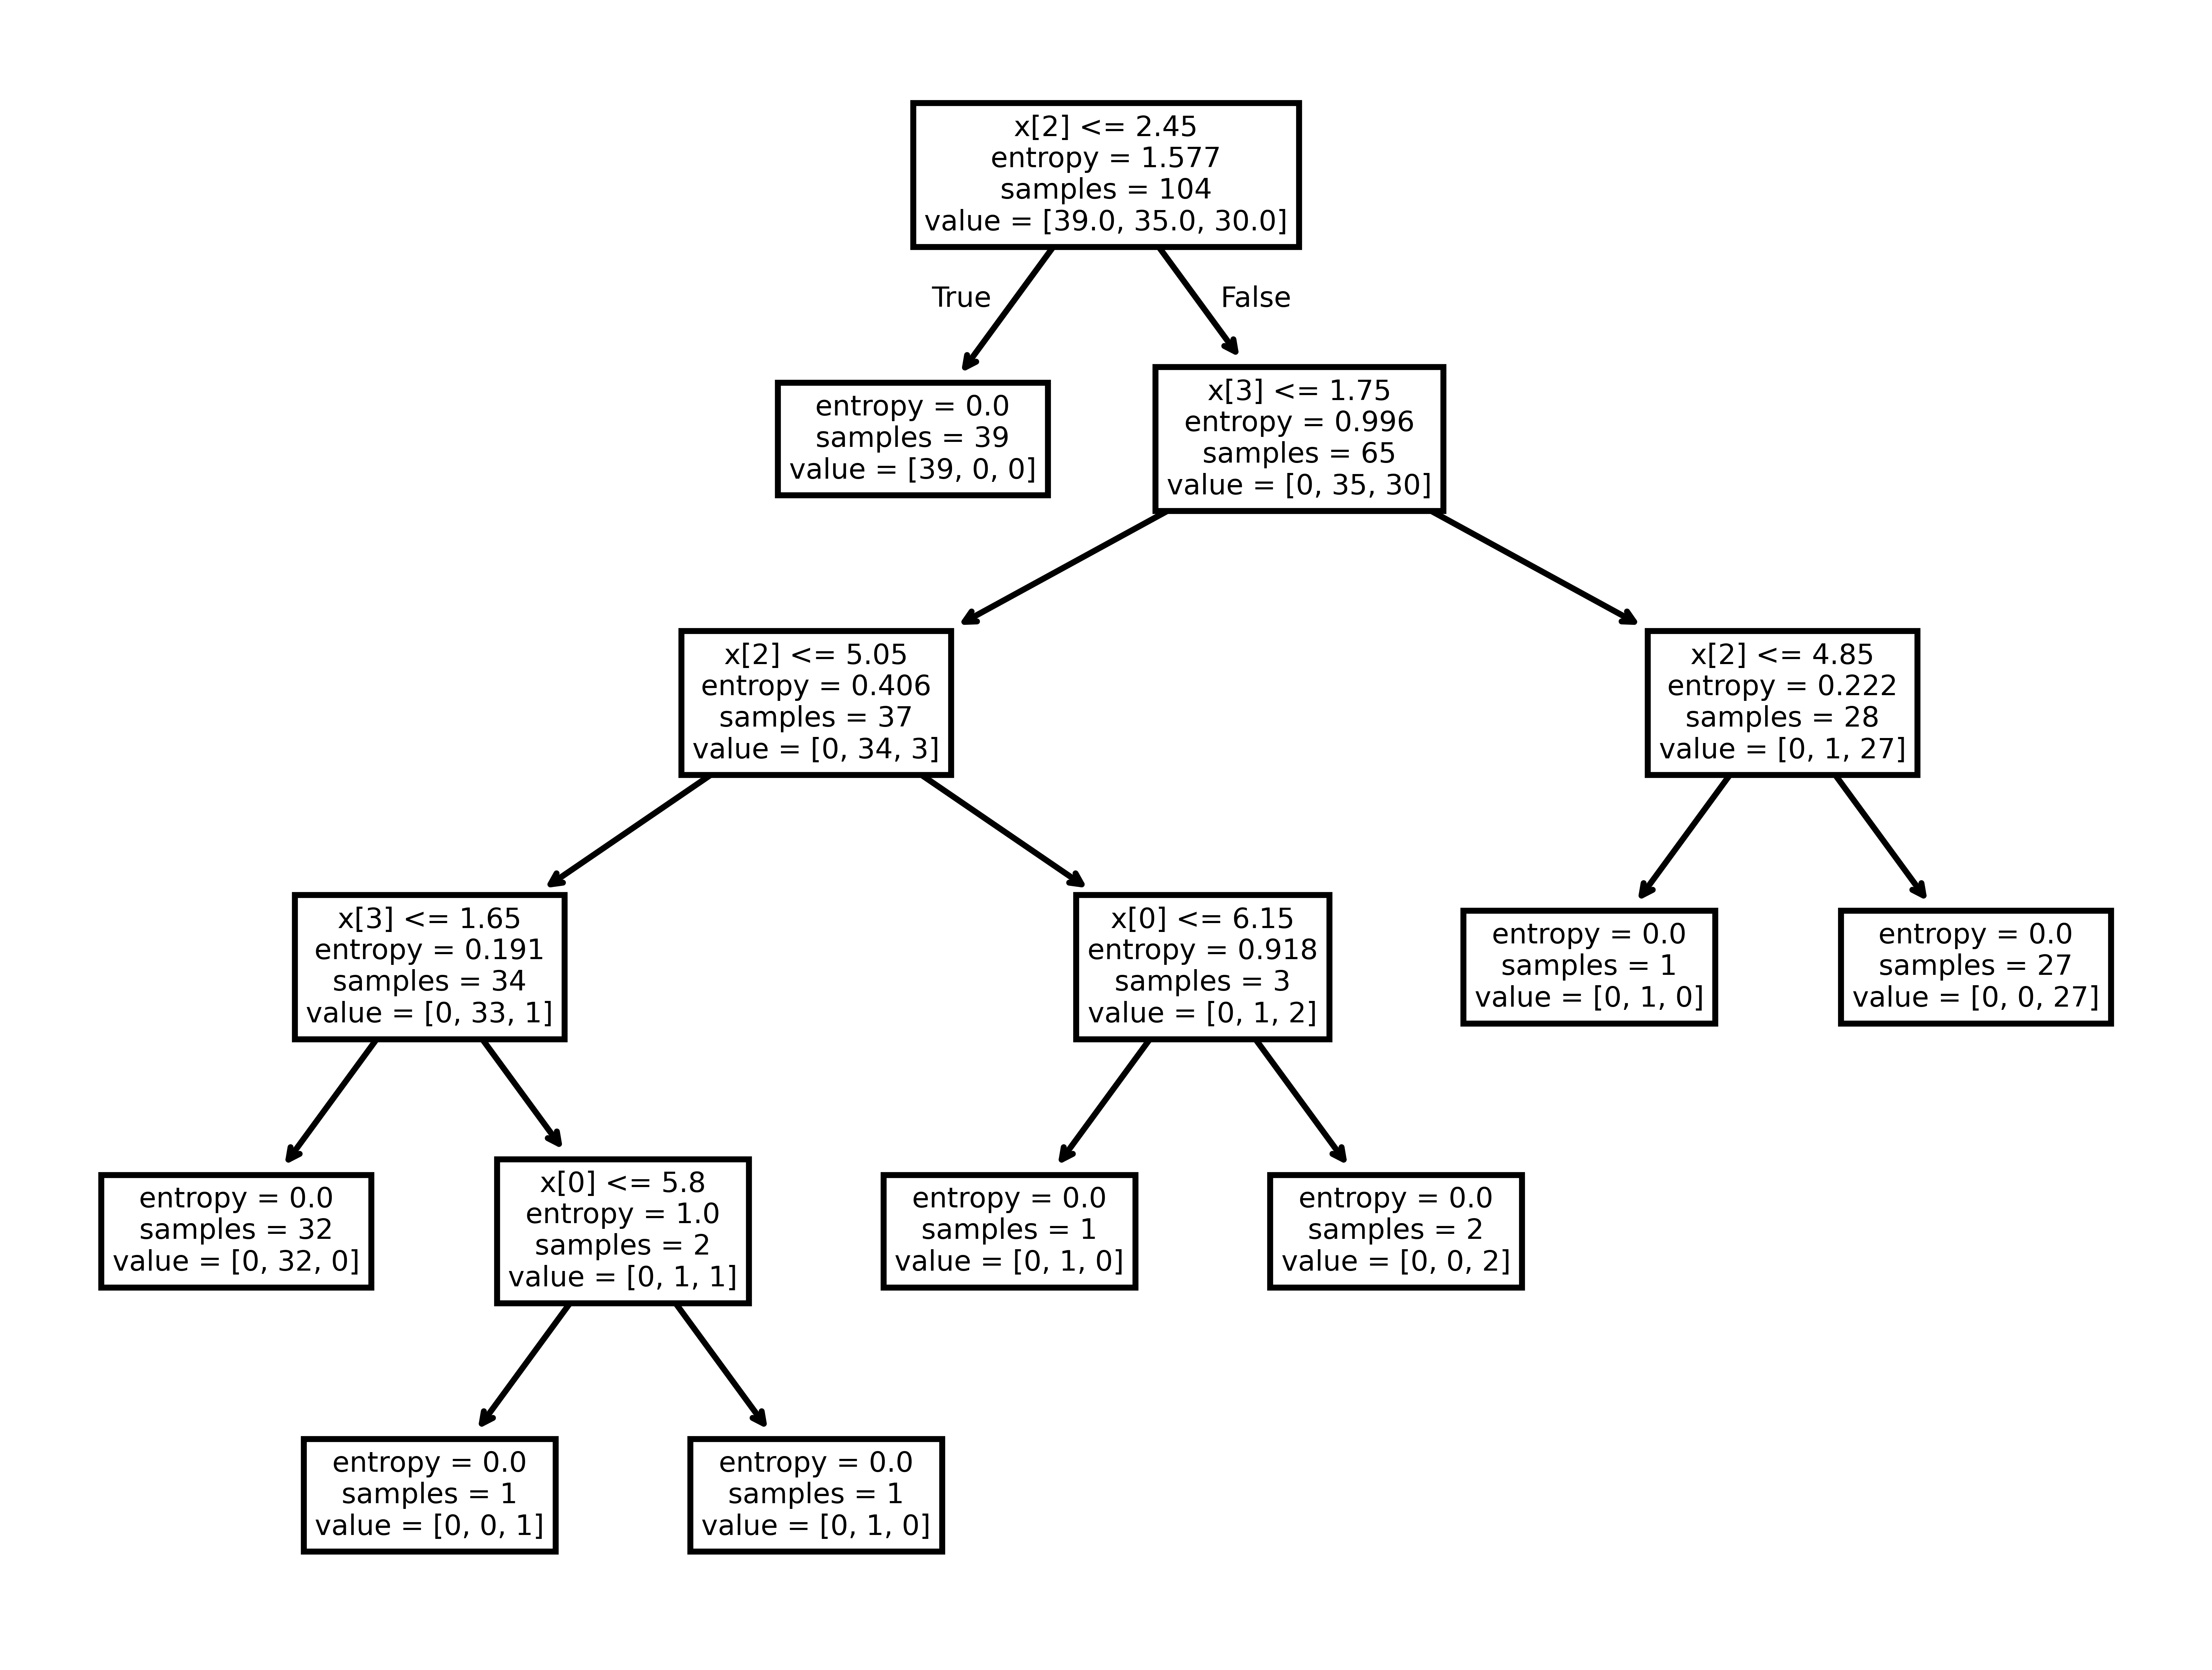

In [20]:
plt.figure(dpi=1200)
tree.plot_tree(model);

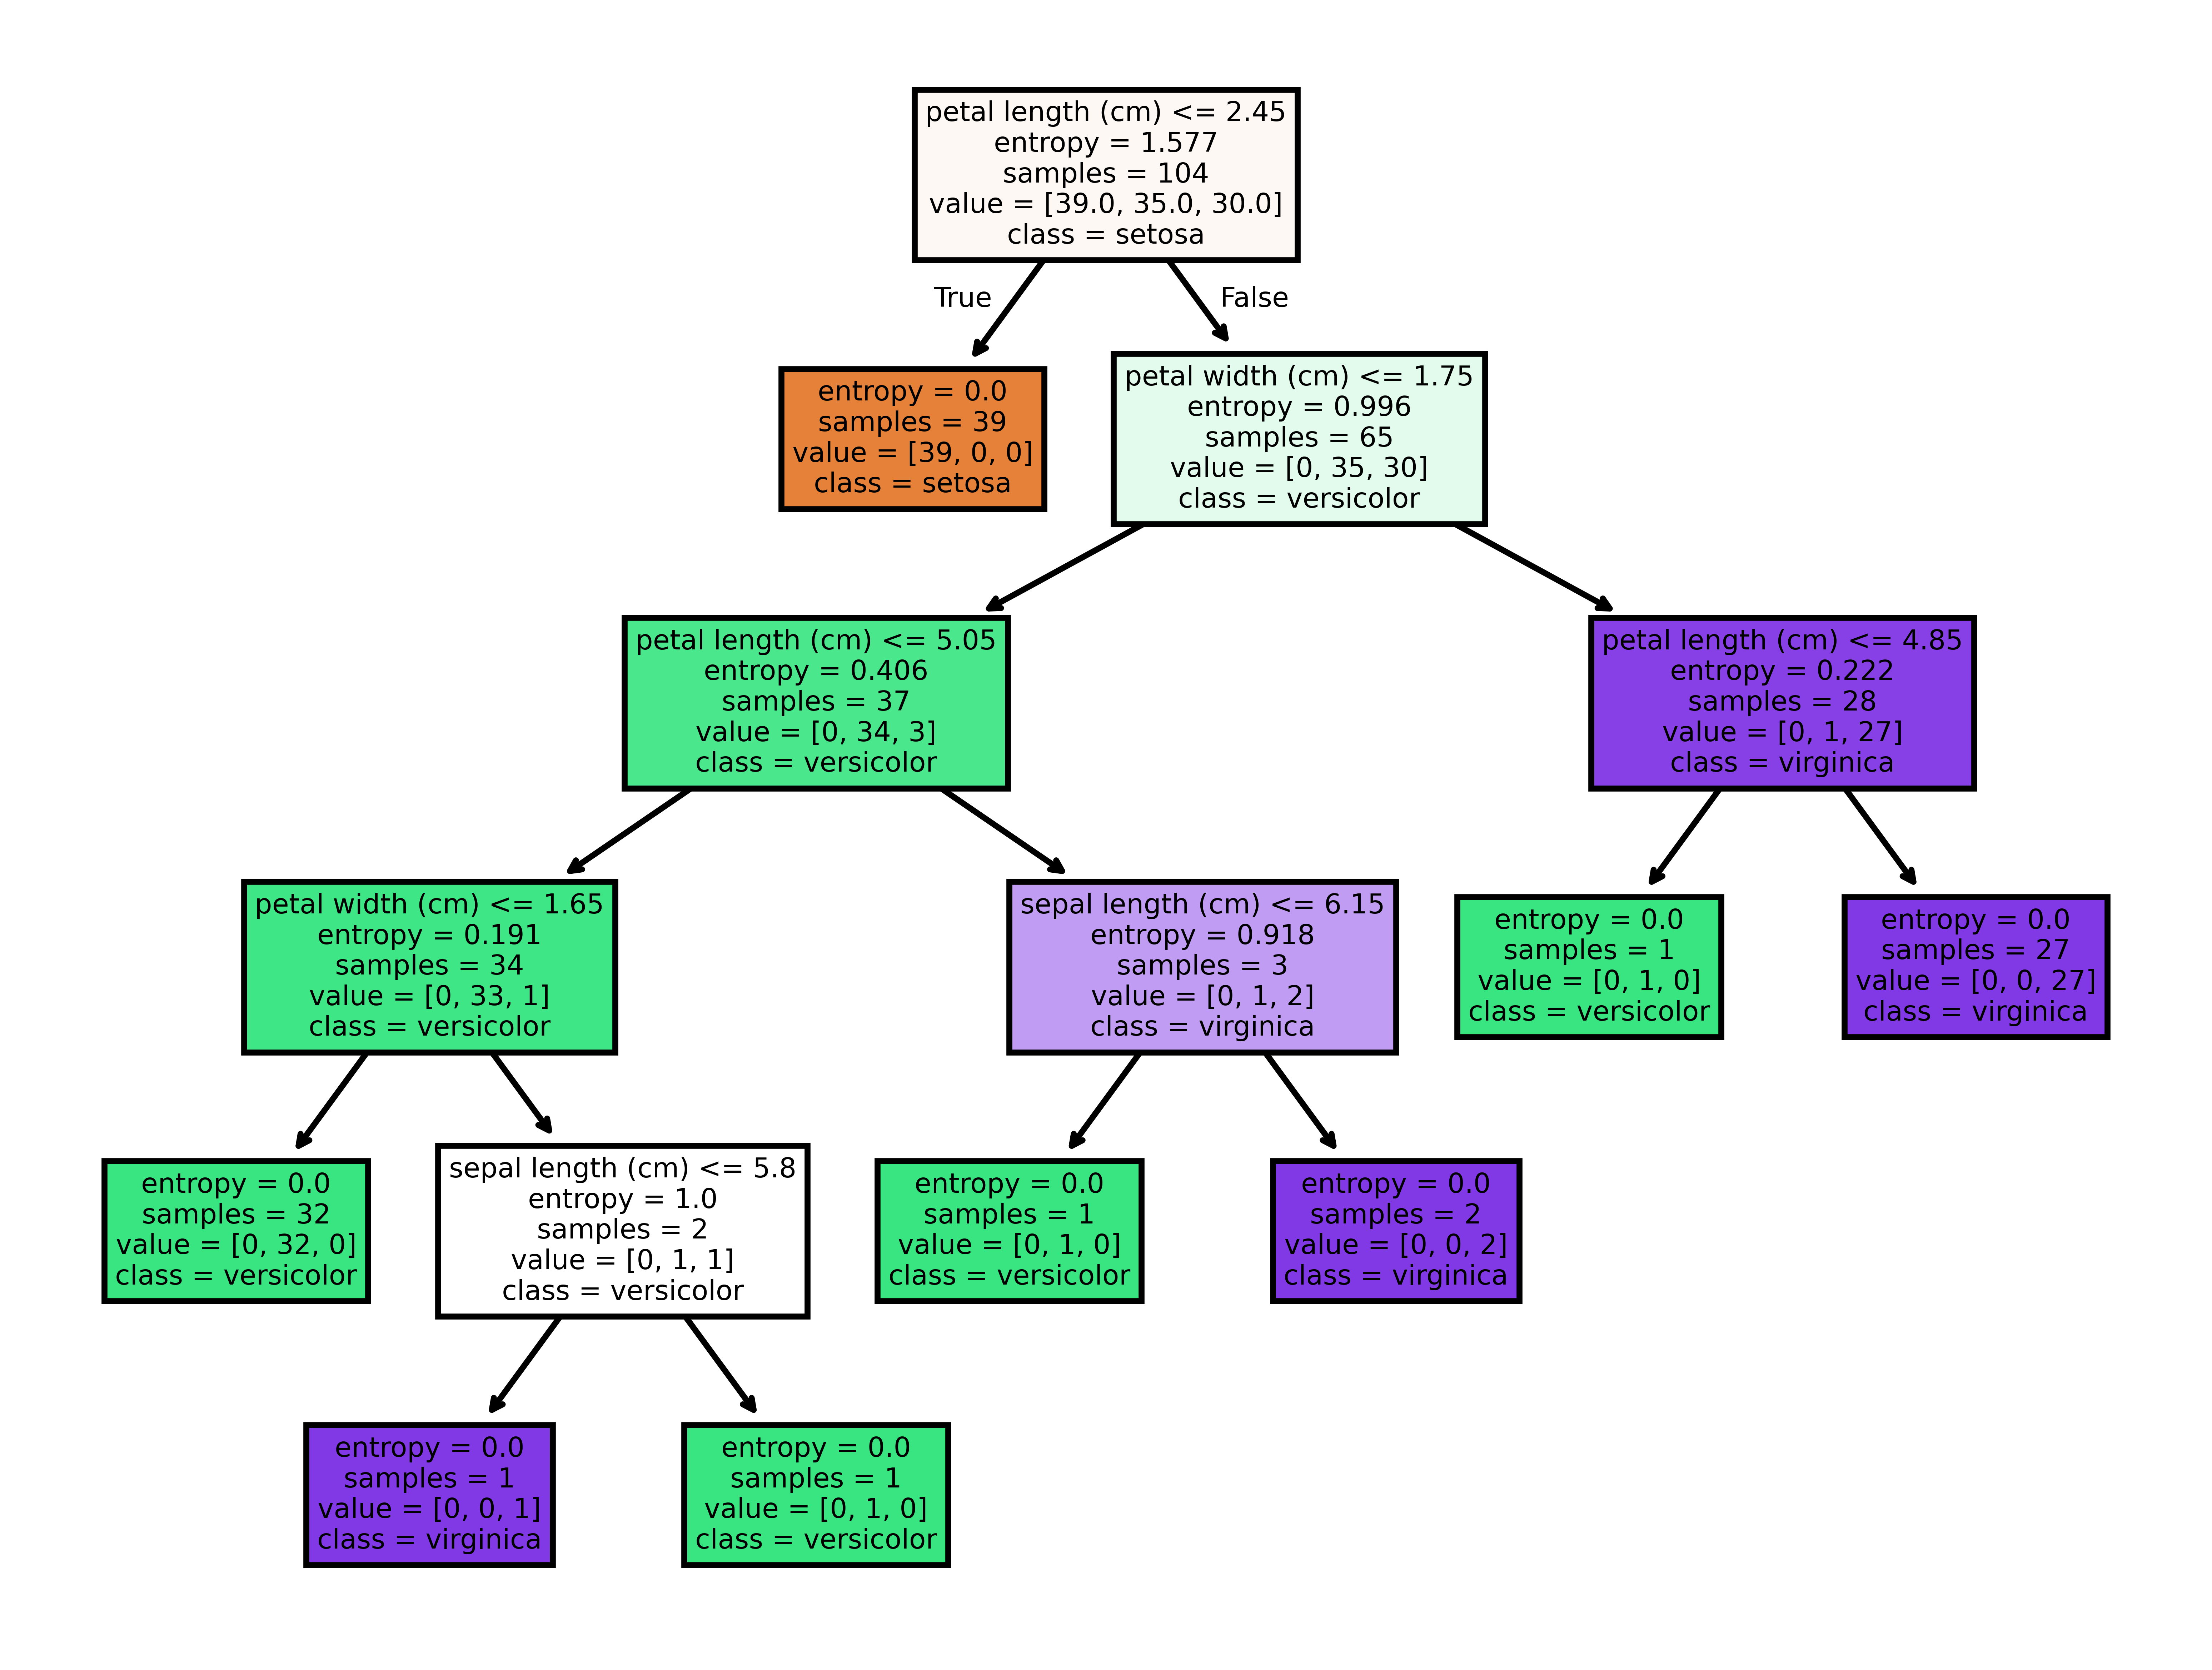

In [42]:
fn = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn = ['setosa','versicolor','virginica']
plt.figure(dpi = 1200)
tree.plot_tree(model, feature_names = fn,class_names = cn,filled = True)
plt.show()

In [44]:
preds = model.predict(x_test)
preds

array([1, 1, 0, 1, 1, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2, 1, 1, 0, 1, 2, 0, 0,
       2, 0, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 0,
       0])

In [48]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.79      1.00      0.88        15
           2       1.00      0.79      0.88        19

    accuracy                           0.91        45
   macro avg       0.93      0.93      0.92        45
weighted avg       0.93      0.91      0.91        45

